# Homework 4
- Madison Rusch
- Mark Minxing Zhao
- Tim Taylor
- Qayum Khan

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

## 1.1 The Term Spread

<b>What is the term spread?</b>

The term spread is the difference between the long-term and short-term interest rates. It is usually calculated by subtracting the rate of the three month Treasury bill from the ten year Treasury bond.

<b>What is the preferred measure of the term spread in the case?</b>

The rates used usually come from Treasury securities to minimize issues of credit risk, and as stated earlier is calculated using the three month Treasury bill and the ten year Treasury bond.

<b>What evidence is cited for the term spread's power in predicting recessions?</b>

Historical evidence seems to be the main evidence used when determining the term spread's power for predicting recessions, as it seems to show that when the yield curve is positively sloped, economic growth is strong over the next 4-6 quarters. It also shows that when yield curve is inverted, it predicts a recession.

<b>Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?</b>

The month-over-month change of the term spread seems to have the most impact in determining economic growth/recession.

<b>Using the file yields_2022-11-30.xlsx, calculate the term spread as of the end of November 2022. (Measure it with the 10-year and 1-year yields.)</b>

In [67]:
filepath_rawdata = f'../data/yields_2022-11-30.xlsx'
rawdata = pd.read_excel(filepath_rawdata)
display(rawdata)

,caldt,1,2,5,7,10,20,30
0,1961-06-14,2.935907,3.360687,3.623677,3.768720,3.818819,3.814210,3.815172
1,1961-06-15,2.932936,3.376460,3.671691,3.804225,3.862987,3.828220,3.826316
2,1961-06-16,2.929949,3.375670,3.685431,3.804216,3.863282,3.832922,3.830049
3,1961-06-19,2.920884,3.389970,3.712984,3.824557,3.886205,3.842378,3.837543
4,1961-06-20,2.952419,3.355796,3.685391,3.809274,3.886506,3.856465,3.845018
...,...,...,...,...,...,...,...,...
15341,2022-11-23,4.666103,4.465921,3.886053,3.657613,3.665568,4.010443,3.723134
15342,2022-11-25,4.654875,4.442006,3.859520,3.629335,3.652183,3.995460,3.735102
15343,2022-11-28,4.635645,4.420958,3.868822,3.640823,3.650411,3.996127,3.720517
15344,2022-11-29,4.658083,4.462683,3.918990,3.696951,3.714694,4.065729,3.799570


In [68]:
# End of November
end_of_november_rates = rawdata.iloc[-1]
term_spread = end_of_november_rates[10] - end_of_november_rates[1]
display(term_spread)
print(f'The term spread at the end of the November 2022 is {round(term_spread, 2)}')

-1.1124071332713

The term spread at the end of the November 2022 is -1.11


<b>What does this term spread suggest about economic growth, according to the evidence of Estrella?</b>

This term spread, given that it is negative, seems to imply a recession is coming. It is also a very large negative term spread, compared to the historical examples in Figure 2, which implies it is a strong predictor of a recession to come.

## 1.2 Term premia

<b>What is the term premium? Why is it impossible to get a direct measure of it?</b>

Term premium is some additional value added to the weighted average of short term rates to calculate the long term rate. Conceptually speaking, it is the additional rate added to the ten year bond to offset the risk investors take that interest rates will change over the course of the next ten years. It is impossible to get a direct measure of it because it is only an estimate, not a number written into any contract or able to be directly observed.

<b>Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?</b>

Equation 1 says that the 10-year rate can be written as the expected average of the next ten 1-year rates, plus the term premium defined above. 

Equation 2 is derived from Equation 1, and says the slope of the yield curve is the average of the expected changes in the next ten 1-year rates, plus the term premium. 

Sacks argues that the term premium complicates the relationship found by Estrella, because changes in the term premia may drive changes in the yield curve which would predict results exactly opposite of what Estrella found. For example, if the term premium became smaller, and the yield curve flattened (slope decreased) as a result, then we could expect growth in the economy, not stagnation.

## 1.3
<b>Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero.

What does an upward sloping yield curve predict about future short-term rates?</b>

Using Equation 2, we can see that if term premia were 0, then on average we can expect to see a positive change in the short term rates over the next ten years. In other words, a positive sloping yield curve would predict higher future short-term rates.

<b>In this case, is it risky to hold long-term bonds? Is this risk compensated?</b>

It is risky to hold long term bonds. If we predict that the short term rates will increase, then our bond's value will drop over the course of the next ten years. Without the term premia to offset this growth in interest rates in the long-term bond rate, we are better off just buying 10 short term bills. In other words, when term premia = 0, this risk is not compensated.

<b>Suppose the term premium increases 3 percentage points. What would change about your previous answer?</b>

Holding the long term bond becomes less risky if the term premium increases by 3 points. If we predict that over the next ten years rates will rise by less than 3%, then we are more than adequately compensated for interest rate risk in the 10-year bond. If we predict that interest rates will rise by more than 3%, then there is still risk in the 10-year bond, but less of it.

# 2 Calculating Forwards
Use the treasury issues in '../data/selected_treasury_rates.xlsx.xlsx.

The selected treasuries are at nearly six-month intervals. Approximate that they mature at perfect 6-month intervals. (We are looking at them from the perspective of March 31, 2022.)


In [69]:
filepath_rates = f'../data/selected_treasury_rates.xlsx'
rate_data = pd.read_excel(filepath_rates)
rate_data = rate_data.set_index('KYTREASNO')
display(rate_data)

,issue date,maturity date,maturity,coupon rate,price,ytm
KYTREASNO,,,,,,
206896,2015-09-30,2022-09-30,0.501027,1.750,100.363281,0.010144
207688,2021-03-31,2023-03-31,0.999316,0.125,98.457031,0.016804
207775,2021-09-30,2023-09-30,1.500342,0.250,97.218750,0.021307
207077,2017-03-31,2024-03-31,2.001369,2.125,99.570312,0.023294
207416,2019-09-30,2024-09-30,2.502396,1.500,97.621094,0.024680
207507,2020-03-31,2025-03-31,3.000684,0.500,94.175781,0.025101
207256,2018-09-30,2025-09-30,3.501711,3.000,101.554688,0.025142
207337,2019-03-31,2026-03-31,4.000000,2.250,98.929688,0.025154
207777,2021-09-30,2026-09-30,4.501027,0.875,93.042969,0.025020


## 2.1
Bootstrap the discount factor. Plot the answer in terms of discount factors and discount rates.

In [70]:
# Function to get coupon dates
# quote_date = 'today'
# maturity_date = maturity date of a given issue
def get_coupon_dates(quote_date,issue_date,maturity_date):

    if isinstance(issue_date,str):
        issue_date = datetime.datetime.strptime(issue_date,'%Y-%m-%d')
        
    if isinstance(maturity_date,str):
        maturity_date = datetime.datetime.strptime(maturity_date,'%Y-%m-%d')
    
    # divide by 180 just to be safe
    # I used 'M' here to always get the coupon at the end of the month (so the coupons would line up)
    # You could also do freq=pd.DateOffset(months=6) for every six months
    # I also swapped out periods for a start date so that I could start on March 2022
    temp = pd.date_range(start=issue_date, end=maturity_date, freq='M')
    # filter out if one date too many
    temp = pd.DataFrame(data=temp[temp > quote_date])

    out = temp[0]
    return out

# First get the cashflows
def calc_cashflows(quote_data, maturity_column = 'TMATDT', today_date = datetime.datetime.today(), coupon_column= 'TCOUPRT', issue_date_column = 'TDATDT'):
    
    CF = pd.DataFrame(data=0, index=quote_data.index, columns=quote_data[maturity_column].unique())

    for i in quote_data.index:
        coupon_dates = get_coupon_dates(today_date,quote_data.loc[i,issue_date_column],quote_data.loc[i,maturity_column])

        if coupon_dates is not None:
            CF.loc[i,coupon_dates] = quote_data.loc[i,coupon_column]/2

        CF.loc[i,quote_data.loc[i,maturity_column]] += 100


    CF = CF.fillna(0).sort_index(axis=1)
    CF.drop(columns=CF.columns[(CF==0).all()],inplace=True)
        
    return CF

cashflows = calc_cashflows(rate_data, 'maturity date', datetime.datetime(2022, 3, 31), 'coupon rate', 'issue date')
display(cashflows)

,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,...,2028-06-30,2028-07-31,2028-08-31,2028-09-30,2028-10-31,2028-11-30,2028-12-31,2029-01-31,2029-02-28,2029-03-31
KYTREASNO,,,,,,,,,,,,,,,,,,,,,
206896,0.8750,0.8750,0.8750,0.8750,0.8750,100.8750,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207688,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207775,0.1250,0.1250,0.1250,0.1250,0.1250,0.1250,0.1250,0.1250,0.1250,0.1250,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207077,1.0625,1.0625,1.0625,1.0625,1.0625,1.0625,1.0625,1.0625,1.0625,1.0625,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207416,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207507,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,0.2500,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207256,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207337,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207777,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


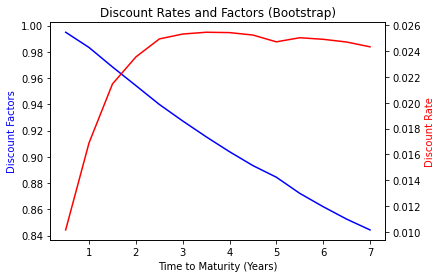

In [71]:
# Now get prices 
prices = rate_data['price'][cashflows.index].values

# And only keep cashflows on maturity dates
maturity_dates_only_filter = cashflows.columns[(cashflows>=100).any()]
filtered_cashflows = cashflows[maturity_dates_only_filter]

# Now bootstrap
mod = LinearRegression(fit_intercept=False).fit(filtered_cashflows.values,prices)
# This is Y-Axis (discount factors)
discount_factors = mod.coef_

# Get the X-Axis (time to maturity in years)
dates = filtered_cashflows.columns
date_diff = dates-datetime.datetime(2022, 3, 31)
maturity_delta = date_diff / pd.Timedelta('365.25 days')

# Now that we have discount factors, we can convert to discount rates
discount_rates = (2 * (1/discount_factors**(1/(2 * maturity_delta)) - 1))

# Graph
fig, ax = plt.subplots()

x = maturity_delta
y1 = discount_factors
y2 = discount_rates

plt.title('Discount Rates and Factors (Bootstrap)')
ax.plot(x, y1, color="blue")                  # set line color to blue
ax.set_xlabel('Time to Maturity (Years)')
ax.set_ylabel('Discount Factors', color="blue")        # set y axis title to blue

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(x, y2, color="red")                  # set line color to red
ax2.set_ylabel('Discount Rate', color="red")        # set y axis title to red

plt.show()

## 2.2
Calculate the entire forward curve for rates from T to T+5, ranging T from 0.5 through 6.5.

Plot the forward discount curve.

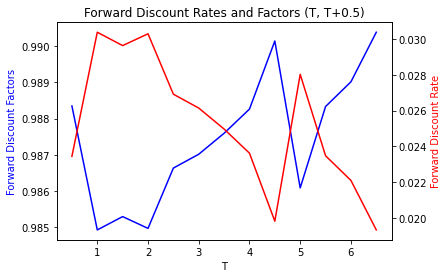

In [83]:
# T Values (X-Axis)
T = np.arange(0.5, 7, 0.5)

# Forward discount factors (Y-Axis)
forward_discount_factors = []
for i in range(len(discount_factors) -1):
    T1_discount_factor = discount_factors[i]
    T2_discount_factor = discount_factors[i+1]
    forward_discount_factors.append(T2_discount_factor/T1_discount_factor)
    
# Note the relationship between discount rates and factors (rate = -ln(factors)/(t2-t1))
forward_discount_rates = -np.log(forward_discount_factors)/0.5
    
# Graph
fig, ax = plt.subplots()

x = T
y1 = forward_discount_factors
y2 = forward_discount_rates

plt.title('Forward Discount Rates and Factors (T, T+0.5)')
ax.plot(x, y1, color="blue")                  # set line color to blue
ax.set_xlabel('T')
ax.set_ylabel('Forward Discount Factors', color="blue")        # set y axis title to blue

# We create another axis object. It shares the same x axis as ax, but the y-axis is separate.
ax2 = ax.twinx()
ax2.plot(x, y2, color="red")                  # set line color to red
ax2.set_ylabel('Forward Discount Rate', color="red")        # set y axis title to red

plt.show()

# NOTE: Forward Curve = Forward Rate
# NOTE: Discount Curve = Discount Factors


## 2.3
Use the discount factors to calculate the forward rate from T1=2 to T2=2.5.

Do the same for T1=5 to T2=5.5.

In [86]:
discount_factor_2 = forward_discount_factors[3]
discount_factor_5 = forward_discount_factors[9]

forward_rate_2 = -np.log(discount_factor_2)/0.5
forward_rate_5 = -np.log(discount_factor_5)/0.5

print(f'The forward rate from time 2 to 2.5 is {round(forward_rate_2, 4)}')
print(f'The forward rate from time 5 to 5.5 is {round(forward_rate_5, 4)}')

The forward rate from time 2 to 2.5 is 0.0303
The forward rate from time 5 to 5.5 is 0.028


## 2.4
<b>Explain how an FRA between T1 and T2 would function. How is the rate calculated above involved?</b>

Today:

- For a forward rate agreement between T1 and T2, two parties (call them Group A and Group B) would enter an agreement today. Group A would make two transactions today. They would short Treasury assets maturing at time T1, and use the funds to buy Treasury assets at time T2.

At time T1:

- Group A will short additional Treasury assets, maturing at time T2, and use the proceeds to close their previous short position.

At time T2:

- Group A will close out all positions, using the proceeds of the long position to close out their second short position. Now interest rate payments will be exchanged. Group B will pay Group A whatever the current spot rate is and Group A will pay Group B fixed rate agreed upon in the contract.

This fixed rate from the contract is the forward rate from time T1 to T2 calculated 'today'.
